# Import important libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from pandas_profiling import ProfileReport

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Import the data

In [47]:
# import train data
df = pd.read_csv('train.csv')

df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [48]:
profile = ProfileReport(df, title="Train Set Spaceship")

profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


# Recognizing the data and analyze

In [49]:
# count of passemgers
print("The total number of passengers is: ", df['PassengerId'].count())

# count of unique homeplanet
print("There are {} unique home planets and these people are from {}.".format(df['HomePlanet'].nunique(), df['HomePlanet'].unique()))

# count of cabin class
print("There are {} cabin classes".format(df['Cabin'].nunique()))

# count of unique destination and unique destination
print("There are {} unique destinations, that is {}".format(df['Destination'].nunique(), df['Destination'].unique()))

# age average with one number after commas
print("Average age: {:.1f}".format(df['Age'].mean()))

# room service average with one number after commas
print("Average money spent on room service: ", round(df['RoomService'].mean(),1))

# food court average with one number after commas
print("Average money spent in food court: ", round(df['FoodCourt'].mean(),1))

# shopping mall average with one number after commas
print("Average money spent in shopping mall: ", round(df['ShoppingMall'].mean(),1))

# spa average with one number after commas
print("Average money spent on spa: ", round(df['Spa'].mean(),1))

# vrdeck average with one number after commas
print("Average money spent on VRDeck: ", round(df['VRDeck'].mean(),1))

# replace cabin class with the first and last alphabet of cabin class
df['Cabin'] = (df['Cabin'].str[0] + '/'+ df['Cabin'].str[-1])

The total number of passengers is:  8693
There are 3 unique home planets and these people are from ['Europa' 'Earth' 'Mars' nan].
There are 6560 cabin classes
There are 3 unique destinations, that is ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
Average age: 28.8
Average money spent on room service:  224.7
Average money spent in food court:  458.1
Average money spent in shopping mall:  173.7
Average money spent on spa:  311.1
Average money spent on VRDeck:  304.9


# Cleaning the data

In [50]:
# search is there any null value in the data frame
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Fill some null values

In [51]:
# replace null values in homeplanet to "Unknown"
df['HomePlanet'].fillna('Unknown', inplace=True)

# replace null values in cabin to "Unknown"
df['Cabin'].fillna('Unknown', inplace=True)

# replace null values in cyrosleep to "Unknown"
df['CryoSleep'].fillna('Unknown', inplace=True)

# replace null values in destination to "Unknown"
df['Destination'].fillna('Unknown', inplace=True) 

# replace null values in age to average age with 1 number after commas
df['Age'].fillna(round(df['Age'].mean(),1), inplace=True)

# replace null values in VIP to "False"
df['VIP'].fillna('Unknown', inplace=True)

# replace null values in name to "Unknown"
df['Name'].fillna('Unknown', inplace=True)

# replace null values in roon service, food court, shopping mall, spa and vrdeck to its average with 1 number after commas
df['RoomService'].fillna(round(df['RoomService'].mean(),1), inplace=True)
df['FoodCourt'].fillna(round(df['FoodCourt'].mean(),1), inplace=True)
df['ShoppingMall'].fillna(round(df['ShoppingMall'].mean(),1), inplace=True)
df['Spa'].fillna(round(df['Spa'].mean(),1), inplace=True)
df['VRDeck'].fillna(round(df['VRDeck'].mean(),1), inplace=True)

# Visualize the data

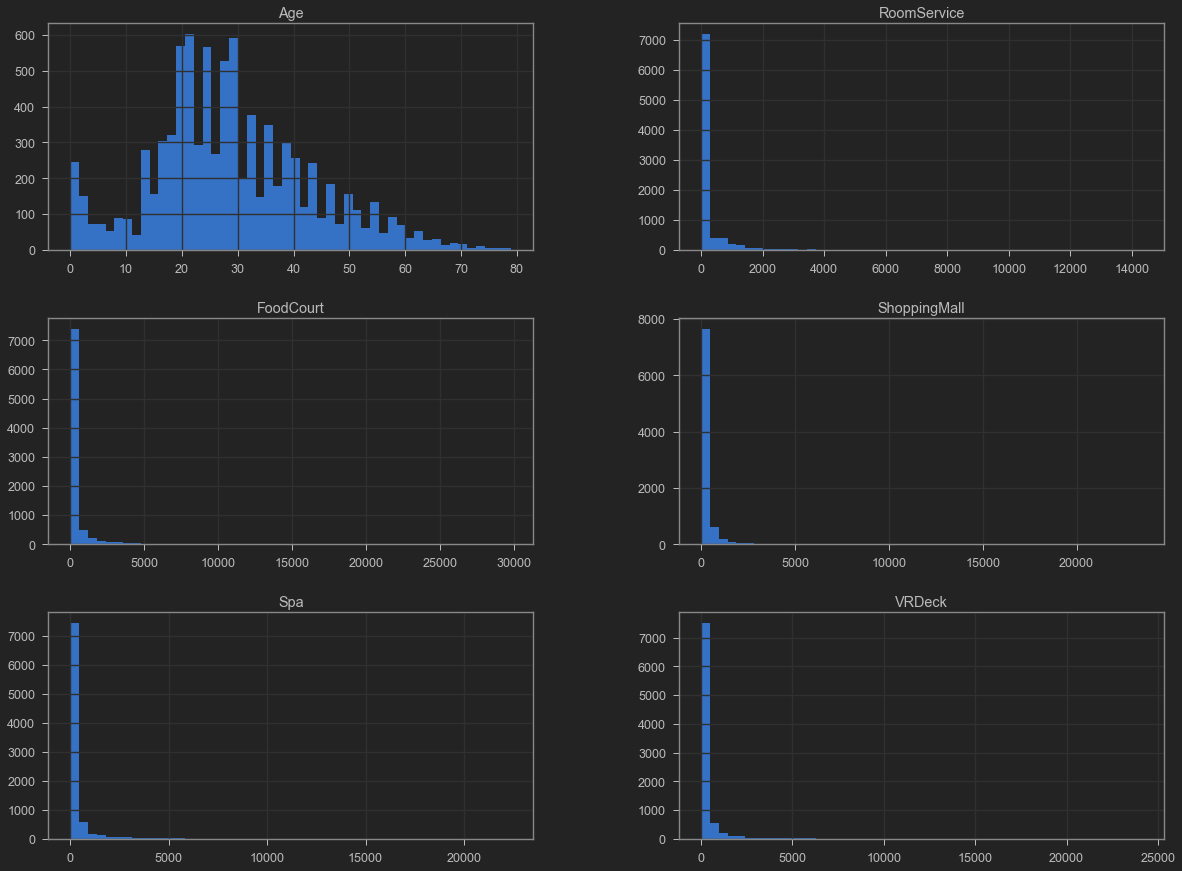

In [52]:
# visuallize the data
df.hist(bins=50, figsize=(20,15))
plt.show()


In [53]:
df.head()

PassengerId HomePlanet CryoSleep Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False   B/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False   F/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False   A/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False   A/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False   F/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

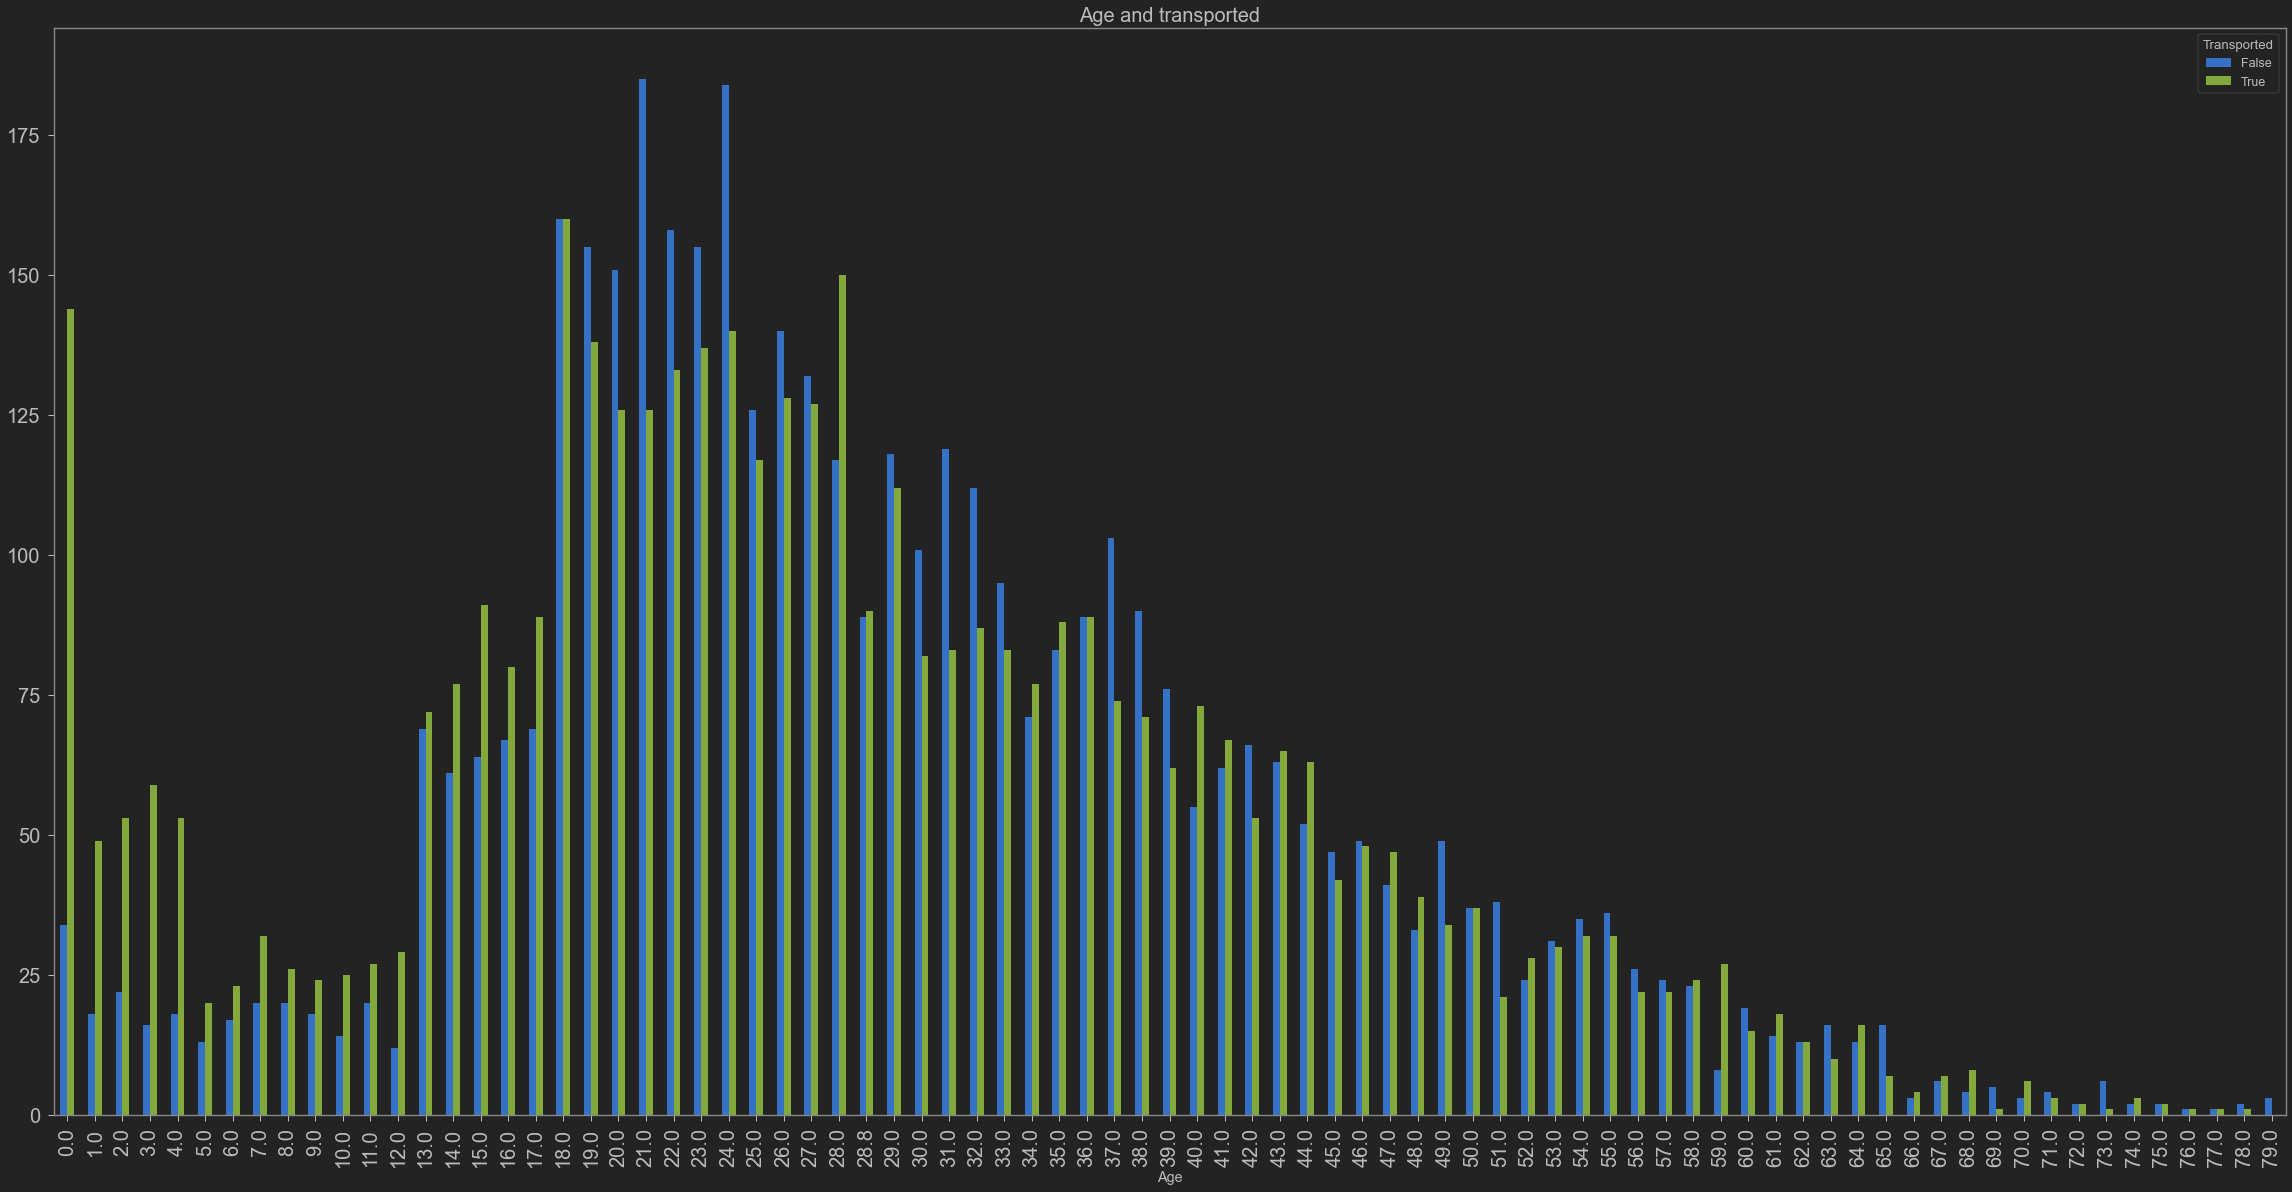

In [54]:
# bar plot of age and transported
df.groupby('Age')['Transported'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(40,20), fontsize=20)
plt.title('Age and transported', fontsize=20)
plt.show()

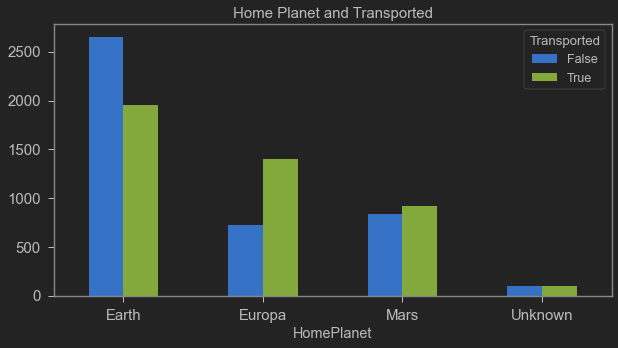

In [55]:
# bar plot of home planet and transported
df.groupby('HomePlanet')['Transported'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(10,5), fontsize=15)
plt.title('Home Planet and Transported', fontsize=15)
plt.xticks(rotation=0)
plt.show()

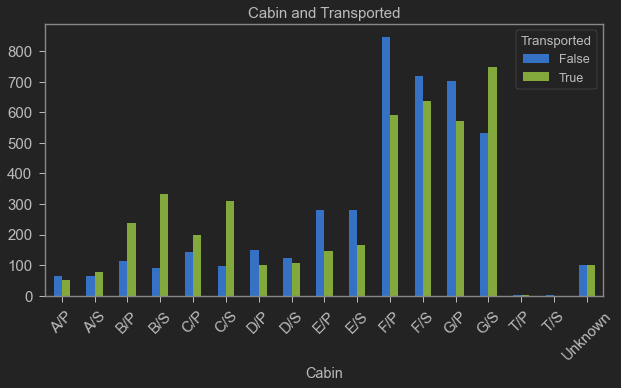

In [56]:
# bar plot of cabin and transported
df.groupby('Cabin')['Transported'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(10,5), fontsize=15)
plt.title('Cabin and Transported', fontsize=15)
plt.xticks(rotation=45)
plt.show()

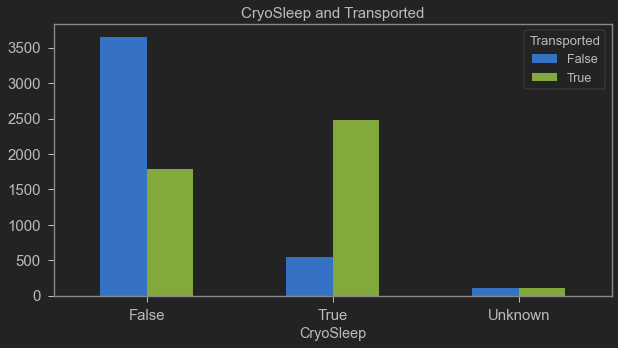

In [57]:
# bar plot of Cryosleep and transported
df.groupby('CryoSleep')['Transported'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(10,5), fontsize=15)
plt.title('CryoSleep and Transported', fontsize=15)
plt.xticks(rotation=0)
plt.show()

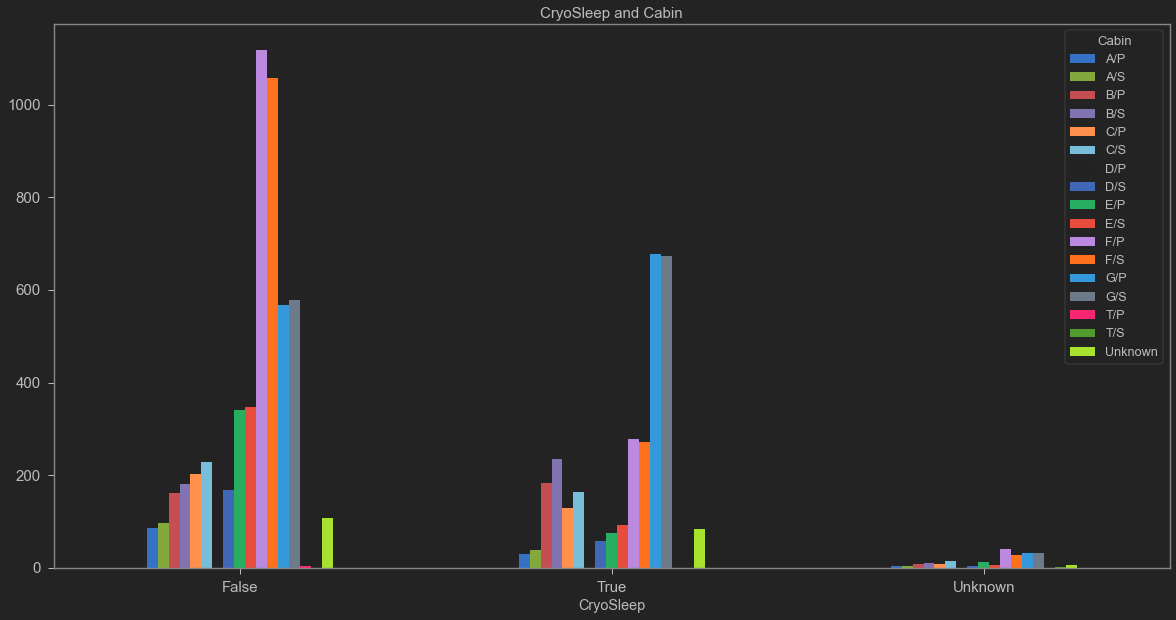

In [58]:
# bar plot of Cryosleep and cabin
df.groupby('CryoSleep')['Cabin'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(20,10), fontsize=15)
plt.title('CryoSleep and Cabin', fontsize=15)
plt.xticks(rotation=0)
plt.show()

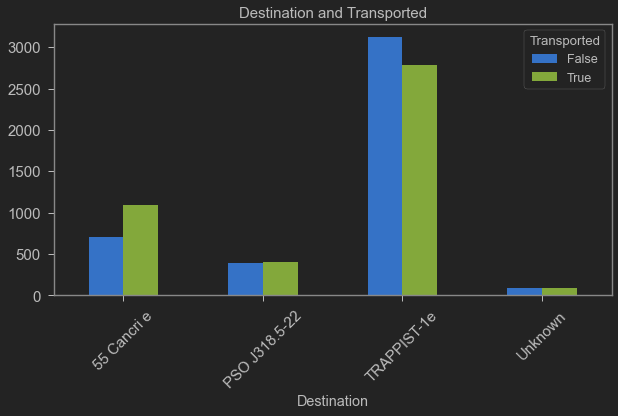

In [59]:
# bar plot of destination and transported
df.groupby('Destination')['Transported'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(10,5), fontsize=15)
plt.title('Destination and Transported', fontsize=15)
plt.xticks(rotation=45)
plt.show()

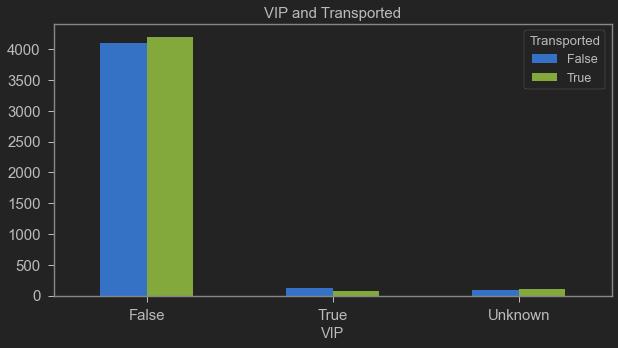

In [60]:
# bar plot of VIP and transported
df.groupby('VIP')['Transported'].value_counts().unstack().plot(kind='bar', stacked=False, figsize=(10,5), fontsize=15)
plt.title('VIP and Transported', fontsize=15)
plt.xticks(rotation=0)
plt.show()

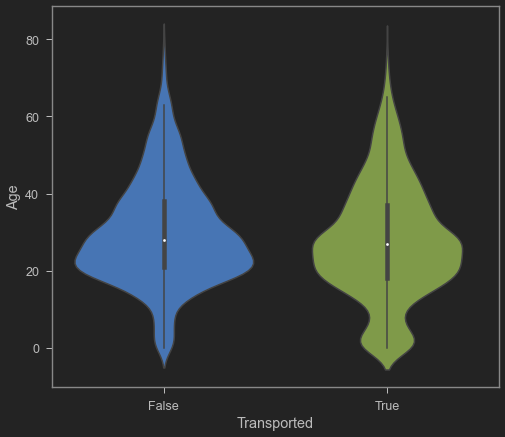

In [61]:
# violin plot of age and transported
sns.violinplot(x='Transported', y='Age', data=df)
plt.show()

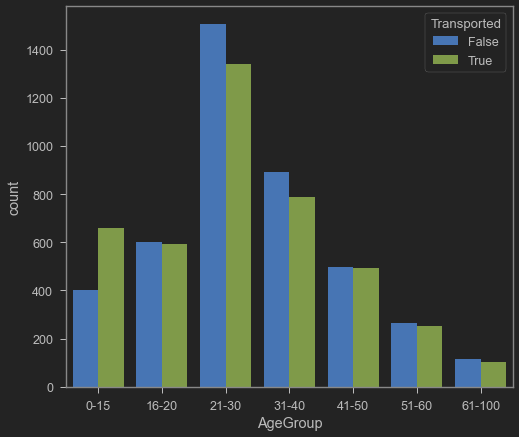

In [62]:
# group people into bins and check the distribution of age with transported column
bins = [0, 15, 20, 30, 40, 50, 60, 100]
group_names = ['0-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-100']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels=group_names)
sns.countplot(hue='Transported', x='AgeGroup', data=df)
plt.show()

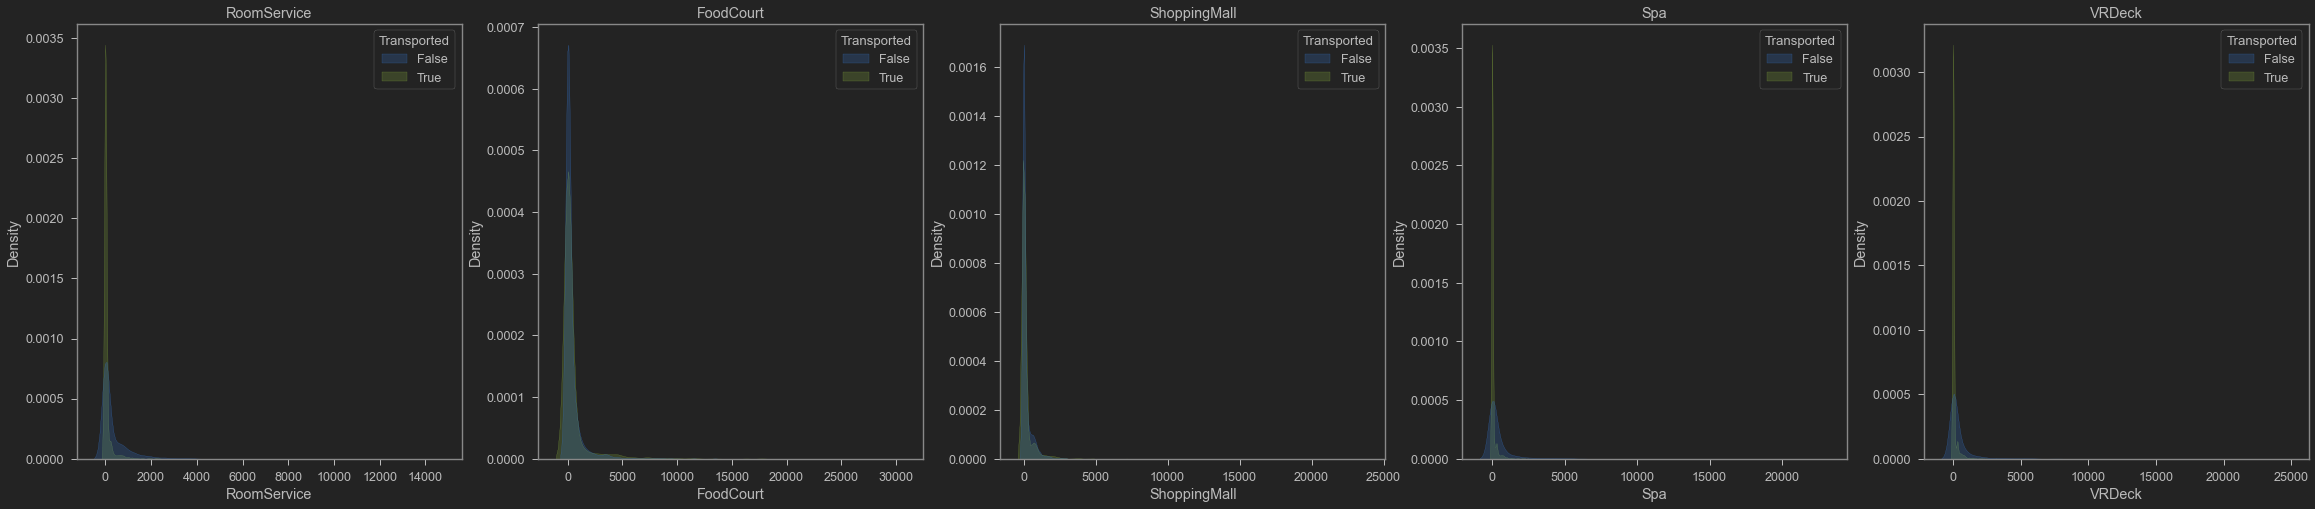

In [63]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - ammenities
cols_to = ['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck','Transported']
calc_df = df[cols_to].copy()
fig, axes = plt.subplots(1, 5, figsize=(40,8))
for i, col in enumerate(cols_to[:-1]):
    sns.kdeplot(data=calc_df, x=col, hue='Transported', ax=axes[i], fill=True)
    axes[i].set_title(col)

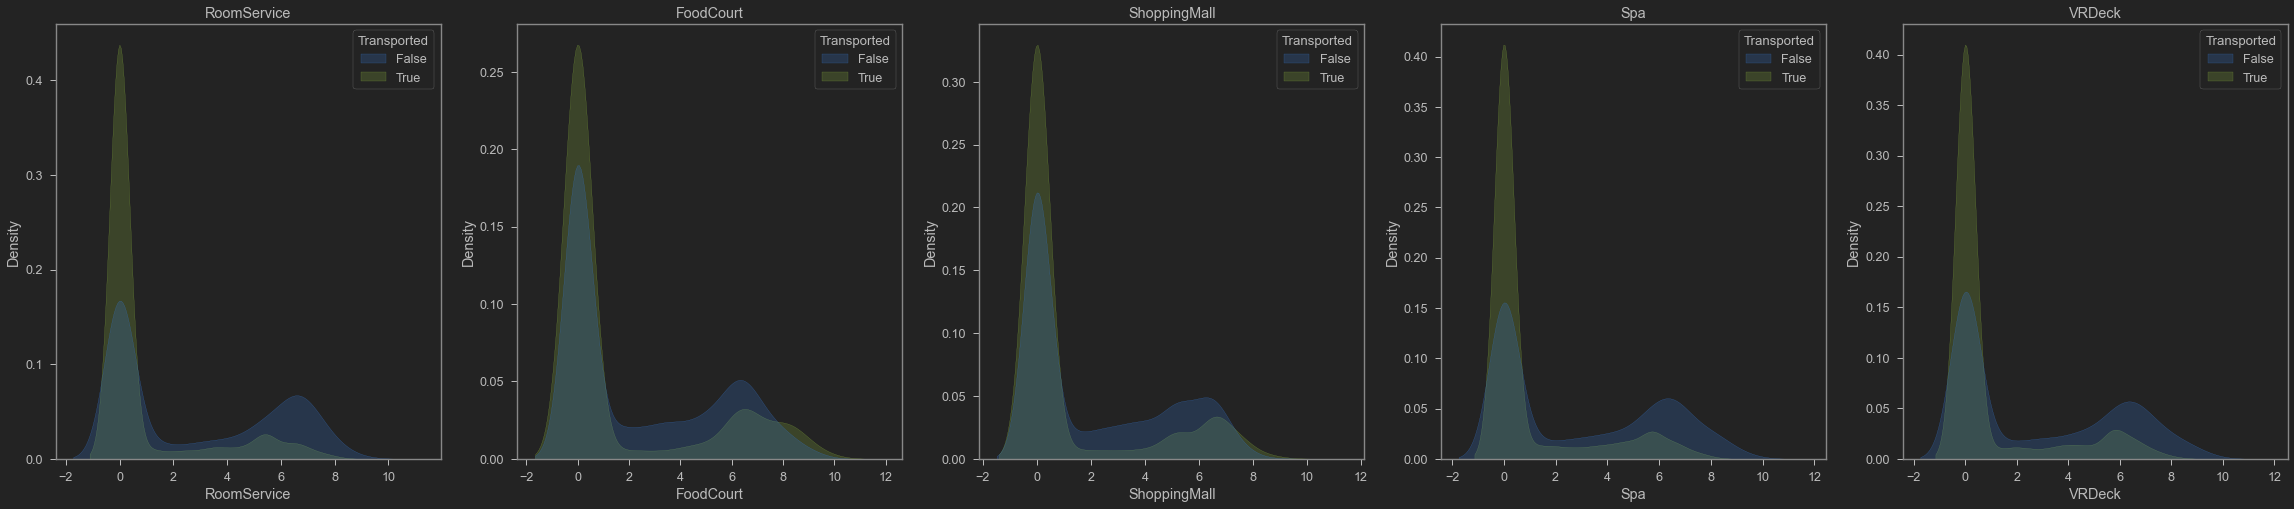

In [64]:
# apply function log1p for a better interpretation of the data
df['RoomService'] = np.log1p(df['RoomService'])
df['FoodCourt'] = np.log1p(df['FoodCourt'])
df['ShoppingMall'] = np.log1p(df['ShoppingMall'])
df['Spa'] = np.log1p(df['Spa'])
df['VRDeck'] = np.log1p(df['VRDeck'])

cols_to = ['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck','Transported']
calc_df = df[cols_to].copy()
fig, axes = plt.subplots(1, 5, figsize=(40,8))
for i, col in enumerate(cols_to[:-1]):
    sns.kdeplot(data=calc_df, x=col, hue='Transported', ax=axes[i], fill=True)
    axes[i].set_title(col)

# Changing data for prediction and import Test Data

In [65]:
# import test data
test_df = pd.read_csv('test.csv')

df.head()
# test_df.head()

PassengerId HomePlanet CryoSleep Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False   B/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False   F/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False   A/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False   A/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False   F/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall       Spa    VRDeck  \
0     0.000000   0.000000      0.000000  0.000000  0.000000   
1     4.700480   2.302585      3.258097  6.309918  3.806662   
2     3.784190   8.182280      0.000000  8.812248  3.912023   
3     0.000000   7.157735      5.918894  8.110728  5.267858   
4     5.717028   4.262680      5.023881  6.338594  1.098612   

                Name  Transported AgeGroup  
0    Maham Ofracculy        False    31-40  
1       Juanna Vines         True    21-30  
2      Altark Susent        False    51-60  
3       Solam Susent        False    31-40  
4  Willy Santantines         True    16-20

In [66]:
# print destination unique
print(df['Destination'].unique())

# print home planet unique
print(df['HomePlanet'].unique())

# print vip unique
print(df['VIP'].unique())

# replace cabin class test data with the first and last alphabet of cabin class
test_df['Cabin'] = (test_df['Cabin'].str[0] + '/'+ test_df['Cabin'].str[-1])

# print cabin unique sorted
print(df['Cabin'].unique())

# print cryosleep unique
print(df['CryoSleep'].unique())

# print vip unique
print(df['VIP'].unique())


['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' 'Unknown']
['Europa' 'Earth' 'Mars' 'Unknown']
[False True 'Unknown']
['B/P' 'F/S' 'A/S' 'F/P' 'G/S' 'Unknown' 'G/P' 'E/S' 'D/P' 'C/S' 'C/P'
 'D/S' 'B/S' 'A/P' 'E/P' 'T/P' 'T/S']
[False True 'Unknown']
[False True 'Unknown']


In [67]:
# replace null values in homeplanet to "Unknown"
test_df['HomePlanet'].fillna('Unknown', inplace=True)

# replace null values in cabin to "Unknown"
test_df['Cabin'].fillna('Unknown', inplace=True)

# replace null values in cyrosleep to "Unknown"
test_df['CryoSleep'].fillna('Unknown', inplace=True)

# replace null values in destination to "Unknown"
test_df['Destination'].fillna('Unknown', inplace=True) 

# replace null values in age to average age with 1 number after commas
test_df['Age'].fillna(round(test_df['Age'].mean(),1), inplace=True)

# replace null values in VIP to "False"
test_df['VIP'].fillna('Unknown', inplace=True)

# replace null values in name to "Unknown"
test_df['Name'].fillna('Unknown', inplace=True)

# replace null values in roon service, food court, shopping mall, spa and vrdeck to its average with 1 number after commas
test_df['RoomService'].fillna(round(test_df['RoomService'].mean(),1), inplace=True)
test_df['FoodCourt'].fillna(round(test_df['FoodCourt'].mean(),1), inplace=True)
test_df['ShoppingMall'].fillna(round(test_df['ShoppingMall'].mean(),1), inplace=True)
test_df['Spa'].fillna(round(test_df['Spa'].mean(),1), inplace=True)
test_df['VRDeck'].fillna(round(test_df['VRDeck'].mean(),1), inplace=True)

test_df.head()

PassengerId HomePlanet CryoSleep Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True   G/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False   F/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True   C/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False   C/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False   F/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [68]:
# replace destination with number
df['Destination'] = df['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2, 'Unknown': 3})
test_df['Destination'] = test_df['Destination'].replace({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2, 'Unknown': 3})

# replace home planet with number
df['HomePlanet'] = df['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2, 'Unknown': 3})
test_df['HomePlanet'] = test_df['HomePlanet'].replace({'Europa': 0, 'Earth': 1, 'Mars': 2, 'Unknown': 3})

# replace cryosleep with number
df['CryoSleep'] = df['CryoSleep'].replace({True: 0, False: 1, 'Unknown': 2})
test_df['CryoSleep'] = test_df['CryoSleep'].replace({True: 0, False: 1, 'Unknown': 2})

# replace vip with number
df['VIP'] = df['VIP'].replace({True: 1, False: 0, 'Unknown': 2})
test_df['VIP'] = test_df['VIP'].replace({True: 1, False: 0, 'Unknown': 2})

# change cabin to numeric
df['Cabin'] = df['Cabin'].replace({'A/P': 0, 'A/S': 1, 'B/P': 2, 'B/S': 3, 'C/P': 4, 'C/S': 5, 'D/P': 6, 'D/S': 7, 'E/P': 8, 'E/S': 9, 'F/P': 10, 'F/S': 11, 'G/P': 12, 'G/S': 13, 'T/P': 14, 'T/S': 15, 'Unknown': 16})
test_df['Cabin'] = test_df['Cabin'].replace({'A/P': 0, 'A/S': 1, 'B/P': 2, 'B/S': 3, 'C/P': 4, 'C/S': 5, 'D/P': 6, 'D/S': 7, 'E/P': 8, 'E/S': 9, 'F/P': 10, 'F/S': 11, 'G/P': 12, 'G/S': 13, 'T/P': 14, 'T/S': 15, 'Unknown': 16})

# change destination, home planet, cryosleep and vip to int
df['Destination'] = df['Destination'].astype(int)
df['HomePlanet'] = df['HomePlanet'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
test_df['Destination'] = test_df['Destination'].astype(int)
test_df['HomePlanet'] = test_df['HomePlanet'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)


# change transported to numeric
df['Transported'] = df['Transported'].replace({True: 0, False: 1})
df['Transported'] = df['Transported'].astype(int)

# change cabin to int
df['Cabin'] = df['Cabin'].astype(int)
test_df['Cabin'] = test_df['Cabin'].astype(int)

In [69]:
# Select the desired features
X_train = df[['Age', 'HomePlanet', 'Destination', 'Cabin', 'CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
Y_train = df['Transported']

X_test = test_df[['Age', 'HomePlanet', 'Destination', 'Cabin', 'CryoSleep', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

# Start the Machine Learning Model

In [70]:
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Stochastic Gradient Descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
sgd_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [72]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
rf_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [73]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
lr_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)


In [74]:
# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
knn_pred = knn.predict(X_test)  
acc_knn = knn.score(X_train, Y_train) 

In [75]:
# Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
gaussian_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [76]:
# Perceptron
perceptron = Perceptron(max_iter=100000)
perceptron.fit(X_train, Y_train)
perceptron_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [77]:
# Linear Support Vector Machine
linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(X_train, Y_train)
linear_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [78]:
# Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
dt_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [79]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree],
    'Sum':   [sum(linear_pred),sum(knn_pred),sum(lr_pred),
             sum(rf_pred),sum(gaussian_pred),sum(perceptron_pred),
             sum(sgd_pred),sum(dt_pred)]
})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

Model   Sum
Score                                      
95.800000               Random Forest  2381
95.800000               Decision Tree  1761
76.540000     Support Vector Machines  1918
76.300000         Logistic Regression  1914
75.280000                 Naive Bayes  2388
69.830000                  Perceptron  2348
67.200000  Stochastic Gradient Decent  1742
0.849879                          KNN  2221

## Tensorflow model

In [80]:
from keras import callbacks

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    keras.layers.Input((21 * 2, )),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 11)                0         
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dropout_2 (Dropout)         (None, 11)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                240       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 10)               

In [81]:
es_callback = keras.callbacks.EarlyStopping(patience=20, verbose=1)

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
# history = model.fit(X_train, Y_train, epochs=500)
history = model.fit(X_train[4000:], Y_train[4000:], batch_size = 1024, 
                    epochs = 1000, validation_data =(X_test[:4000],Y_train[:4000]), 
                    callbacks =[es_callback])

y_pred = model.predict(X_test)

classes = np.argmax(y_pred, axis = 1)

Epoch 1/1000
5/5 [==============================] - 1s 28ms/step - loss: 2.3366 - accuracy: 0.0997 - val_loss: 65.3330 - val_accuracy: 0.0172
Epoch 2/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.2590 - accuracy: 0.1281 - val_loss: 60.2089 - val_accuracy: 0.0510
Epoch 3/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.1902 - accuracy: 0.1715 - val_loss: 56.0352 - val_accuracy: 0.0752
Epoch 4/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.1314 - accuracy: 0.2152 - val_loss: 52.6366 - val_accuracy: 0.1430
Epoch 5/1000
5/5 [==============================] - 0s 7ms/step - loss: 2.0634 - accuracy: 0.2525 - val_loss: 49.8923 - val_accuracy: 0.1922
Epoch 6/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.9950 - accuracy: 0.3053 - val_loss: 47.7357 - val_accuracy: 0.2342
Epoch 7/1000
5/5 [==============================] - 0s 7ms/step - loss: 1.9369 - accuracy: 0.3429 - val_loss: 46.3507 - val_accuracy: 0.3033
Epoch 8/1000

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(Y_train[:4277], y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

134/134 [==============================] - 0s 594us/step


## Grid Search Model

<AxesSubplot:>

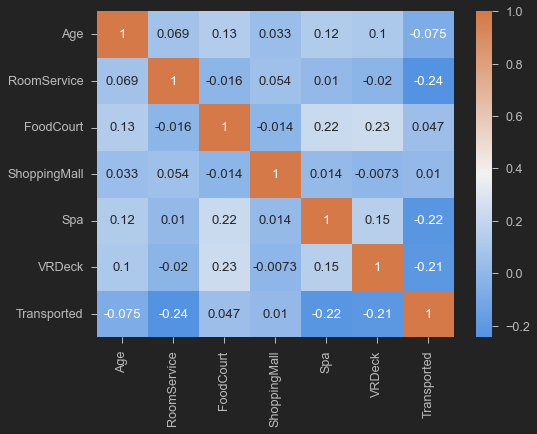

In [83]:
# import original data
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

plt.figure(figsize=(8,6))
corr_matrix = train_set.corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.diverging_palette(250, 30, l=60, as_cmap=True))

In [84]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(train_set.drop('Transported', axis=1), train_set['Transported'], test_size=0.2, random_state=42)

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X, **transform_params):
        df = X.copy()
        df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
        bins = [0, 15, 20, 30, 40, 50, 60, 100]
        group_names = ['0-15', '16-20', '21-30', '31-40', '41-50', '51-60', '61-100']
        df['AgeGroup'] = pd.cut(df['Age'], bins, labels=group_names)
        df[['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']].apply(np.log1p)
        df.drop(['PassengerId', 'Name', 'Cabin', 'Num'] , axis=1, inplace=True)   
        return df

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

#categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#preprocessing pipeline
column_tranformer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['RoomService','FoodCourt', 'ShoppingMall','Spa','VRDeck']),
        ('cat', categorical_transformer, ['Side', 'VIP', 'CryoSleep', 'HomePlanet', 'Destination', 'Deck', 'AgeGroup'])])

# accelerate xgboost by using GPU
ml_pipeline = Pipeline(steps=[('preprocessor', Preprocessor()),
    ('column_transformer', column_tranformer),
    ('classifier', XGBClassifier())])

# tune the parameters of the model
parameters = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
    'classifier__learning_rate': [0.1, 0.05, 0.01],
    'classifier__objective': ['binary:logistic'],
    'classifier__tree_method': ['hist']
}

# perform grid search on the pipeline
grid_search = GridSearchCV(ml_pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
gs_pred = grid_search.predict(test_set)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[16:08:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [85]:
# print the best parameters and the best score
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.80673104076049
Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__objective': 'binary:logistic', 'classifier__tree_method': 'hist'}


In [86]:
# initialize data of lists.
final = {'PassengerId':test_df.PassengerId,
        'Transported':gs_pred}

# Create DataFrame
final_data = pd.DataFrame(final)

# change transported to boolean
final_data['Transported'] = final_data['Transported'].replace({1: True, 0: False})

final_data.head(20)

# Import
# final_data.to_csv(r'Spaceship Grid Search.csv', index=False)